Wskaźnik newsów - LPP
=========================

Notowanie
---------------

In [8]:
import share_price as sp
import plot_helper as ph
%matplotlib inline
data =sp.getLastWeekIntraday('LPP','20190520','20190525')    
                     


Analiza Twittów
----------------------

In [13]:
from twitt_processing import TwittProcessing
from twitter import Twitt
twp= TwittProcessing()

twp. KeyWords= {  'LPP':{
                    'search': ['LPP','Reserved', 'House', 'Cropp', 'Mohito'],
                    'ignore':['interiordesign','Dr house','DeviantArt','house of Cards'],
                    'sentiment':{
                        'tracić':-1,
                        'zainwestować':1,
                        'wzrost':1,
                        'uruchomić':1,
                        'otworzyć':1,
                        'minima':-1,
                        'leczyć':-1
                        }
                }
               }

twt =  twp.indicator('LPP','20190520','20190525')
for t in twt:  
    if 'LPP' not in  t.text and t.sentiment==0:
        t.ignore = True
        
twt_f = list(filter(lambda x: not x.ignore and x.power>10000 and x.sentiment==0 ,twt))
twt_f.sort(key=lambda x: x.power, reverse=True)
for t in twt_f:      
    print('=========================================================================')
    print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
    print('-------------------------------------------------------------------------')
    print(t.text)
    print('-------------------------------------------------------------------------')
    print(t.tokens)


13422 [] 2019-05-23 18:55:59 Przemek Staniszewski
-------------------------------------------------------------------------
@Coach__Trader @Gordi38pl @GotfrydKarol Panowie a wyobraźcie sobie sytuację w której jest e-voting i indywidualni głosują na WZA i są języczkiem u wagi. Nie w PZU czy LPP ale w mniejszych spółkach tak już mogłoby być. Wtedy by się z nami liczono!!!
-------------------------------------------------------------------------
@ Coach__Trader @ Gordi38pl @ GotfrydKarol pan A wyobrazić siebie sytuacja W który być e-voting I indywidualny głosować na WZA I być języczek u waga . nie W PZU czy LPP Al W mniejszy spółka taka już móc być . wtedy by się Z ja liczyć ! ! ! 


Wykres pokazujacy powiazanie miedzy cenami akcji a sentymentem twittów
------------------------------------------------------------------------------------------------------------

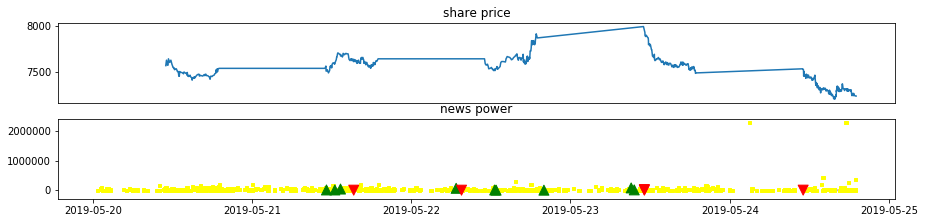

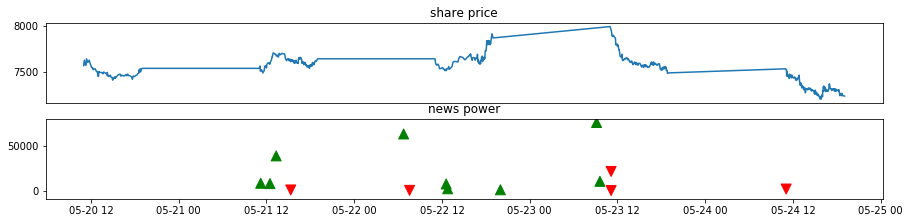

2019-05-21 11:12:58 - wnp.pl - #LPP co roku notuje wzrosty swojej powierzchni handlowej. Firma ma obecnie sieć przeszło 1700 salonów o łącznej powierzchni ponad 1 mln mkw https://t.co/k9F9Mt91Am
2019-05-21 12:28:44 - 🌙Ladżer🌙 - Wiec podsumowując dzisiejszy dzień:
Byłam na dniu otwartym w szkółce indywidualnie z 2koleżankami 
Zrobiłam bezrumowe mohito z miłym i fajnym typiarzem i je wypiłam
Wygrałam quiz o lotnictwie 
Płakałam bo kazali mi tańczyć a ja chciałam ale nie umiałam się ruszyć+atak paniki :)
2019-05-21 13:19:51 - Polverine - zawsze mi się śmiać chce jak sobie przypomnę jak prawie zostałam modelką House'a dzięki koleżance ale przypomnieli sobie żeby zapytać o wzrost XDDDDDD
2019-05-21 15:19:34 - brᥲjᥲᥒ - @97minimalism house of cards, paradise, i need u, euphoria. w szczegolnosci paradise, bo zawsze jak mam zamiar cos posluchac to ta piosenka w pierwszej kolejnosci
2019-05-22 06:45:46 - Zdzisław Ż..(RODO) - NIEPRAWDOPODOBNE!
Demokratyczni członkowie Izby Reprezentantów domagają

In [21]:
import plot_helper 
import datetime

twt_w = twt #list(filter(lambda x: not x.ignore and x.power>100000 and x.sentiment!=0 ,twt))
plot_helper.plot2(data,twt_w)


twt_w2 = list(filter(lambda x: not x.ignore and x.sentiment!=0 ,twt))
plot_helper.plot2(data,twt_w2)

twt_w2.sort(key=lambda x: x.date)
for t in twt_w2:    
    print('=========================================================================')
#   print(str(t.power)+' '+ str(t.sentimentKeys) +' ' +str(t.date)+' ' +str(t.user))
#    print('-------------------------------------------------------------------------')
    print(str(t.date)+' - '+ str(t.user) +' - '+t.text)
#   print('-------------------------------------------------------------------------')
#   print(t.tokens)